<a href="https://colab.research.google.com/github/karthiksankarangit/capstone_project/blob/develop/Capstone_Project_v1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing necessary libraries

In [1]:
#install the supported binaries
#Kaggle
!pip install -q kaggle
#DICOM
!pip install -q pydicom

     |████████████████████████████████| 1.9MB 6.7MB/s 


In [2]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')
#Google drive
from google.colab import drive
from google.colab import files
#OS
import os;
#pandas
import pandas as pd
#plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#dicom
import pydicom as dcm
#glob
from glob import glob
#tqdm
from tqdm import tqdm_notebook

# 2. Folder mounting from GDrive

In [3]:
#mount the drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
#Target Folders
projectFolder = '/content/drive/My Drive/GL_AI_ML/Assignments/Capstone'
dataSetFolder = 'dataset'
train_img_folder ='stage_2_train_images'
test_img_folder='stage_2_test_images'

#  3. Download dataset from Kaggle and store in the Drive
#### * Do not execute this if dataset is already downloaded

In [ ]:
#Create the required directory
! mkdir ~/.kaggle

In [ ]:
#Upload the files : kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthiksankaran87","key":"72f812099595ca494cec2f0d93bfde9e"}'}

In [ ]:
#Copy the file
!cp kaggle.json ~/.kaggle/

In [ ]:
#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Install the kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=c50b1ddf763bc02e77d99c38c5bb5a4af364ea242b2657e0f6b9c6a35403b083
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
#Download the required dataset
!kaggle competitions download -c rsna-pneumonia-detection-challenge

100% 3.66G/3.66G [00:45<00:00, 37.4MB/s]
100% 3.66G/3.66G [00:45<00:00, 87.0MB/s]


In [ ]:
!ls

rsna-pneumonia-detection-challenge.zip


In [ ]:
 #Move the dataset
 !mv rsna-pneumonia-detection-challenge.zip projectFolder 

In [ ]:
#Change the directory and create the folder to 
os.chdir(projectFolder)
!mkdir dataSetFolder

In [ ]:
#Unzip the files to the required folder
!unzip rsna-pneumonia-detection-challenge.zip -d dataSetFolder

Streaming output truncated to the last 5000 lines.
  inflating: dataset/stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: dataset/stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: dataset/stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: dataset/stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: dataset/stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: dataset/stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: dataset/stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: dataset/stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: dataset/stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: dataset/stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: dataset/stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: d

# 4.  Change the working directory

In [6]:
os.chdir(projectFolder)

In [ ]:
!ls

dataset  output  rsna-pneumonia-detection-challenge.zip


### 4.1. Navigate to the folder which contains the dataset and read the csv files

In [ ]:
print('Reading datasets (.csv files) from the folder/',dataSetFolder,'..'*20)
train_labels = pd.read_csv(dataSetFolder+'/stage_2_train_labels.csv')
class_info = pd.read_csv(dataSetFolder+'/stage_2_detailed_class_info.csv')

Reading datasets (.csv files) from the folder/ dataset ........................................


### 4.2. Displays the information about the dataset

In [ ]:
train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
print('Count of the labels :',train_labels.count()[0])

Count of the labels : 30227


In [ ]:
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [ ]:
print('Count of the class info:',class_info.count()[0])

Count of the class info: 30227


### 4.3. Checking NULL values

In [ ]:
missing_df = pd.DataFrame(train_labels.isnull().sum())
missing_df.columns=['Total missing values']
print('Displaying the NULL counts for Labels.......')
missing_df.T

Displaying the NULL counts for Labels.......


,patientId,x,y,width,height,Target
Total missing values,0,20672,20672,20672,20672,0


#### Observation:
* Missing values in x and y indicates absence of Pneumonia's evidence(target label is 0 for those records)

In [ ]:
print('Displaying the NULL counts for Class.......')
missing_df1 = pd.DataFrame(class_info.isnull().sum())
missing_df1.columns=['Total missing values']
missing_df1.T

Displaying the NULL counts for Class.......


,patientId,class
Total missing values,0,0


#### Observation:
* There are  <font color ='Green'> <b>no missing values</b> </font>

# 5. Visualization of different classes

#### 5.1. Distribution of Target (0, 1) and Class(No Lung Opacity / Not Normal / Lung Opacity)

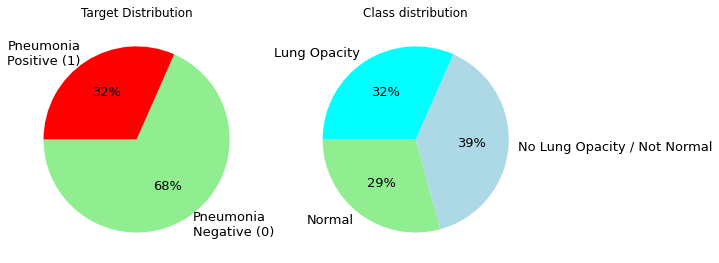

In [ ]:
#Plot the distribution
fig = plt.figure(figsize = (10, 5))
fig_plot = fig.add_subplot(121)
fig_graph = (train_labels['Target'].value_counts()
    .plot(kind = 'pie', autopct = '%.0f%%', 
          labels = ['Pneumonia\nNegative (0)', 'Pneumonia\nPositive (1)'], 
          colors = ['lightgreen', 'red'], 
          startangle = 180, 
          title = 'Target Distribution', fontsize = 13)
    .set_ylabel(''))

fig_plot = fig.add_subplot(122)
fig_graph = (class_info['class'].value_counts().sort_index(ascending = False)
    .plot(kind = 'pie', autopct = '%.0f%%', 
          colors = ['lightgreen', 'lightblue', 'aqua'], 
          startangle = 180, title = 'Class distribution', 
          fontsize = 13)
    .set_ylabel(''))
plt.tight_layout()

#### Observation :
* 68 % of the data supports non existence of Pneumonia
* Lung opacity and No Lung Opacity/Not normal are almost equally distributed

#### 5.2. Get the unique patient id's from the given dataset

In [ ]:
# Get the repeated patient id's
repeated_patient_ids = train_labels.groupby('patientId').size()
repeated_patient_ids

patientId
0004cfab-14fd-4e49-80ba-63a80b6bddd6    1
000924cf-0f8d-42bd-9158-1af53881a557    1
000db696-cf54-4385-b10b-6b16fbb3f985    2
000fe35a-2649-43d4-b027-e67796d412e0    2
001031d9-f904-4a23-b3e5-2c088acd19c6    2
                                       ..
fffb2395-8edd-4954-8a89-ffe2fd329be3    2
fffba05a-1635-4545-9bbd-57ad4cfe8d27    1
fffc95b5-605b-4226-80ab-62caec682b22    1
fffcff11-d018-4414-971a-a7cefa327795    1
fffec09e-8a4a-48b1-b33e-ab4890ccd136    1
Length: 26684, dtype: int64

In [ ]:
print('Number of Unique patient IDs in the dataset: {}'.format(len(repeated_patient_ids)))

Number of Unique patient IDs in the dataset: 26684


#### 5.3. Check for the boundary boxes agains the patient

In [ ]:
bounding_boxes= repeated_patient_ids.to_frame('number_of_boxes').reset_index()
bounding_boxes

,patientId,number_of_boxes
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,1
1,000924cf-0f8d-42bd-9158-1af53881a557,1
2,000db696-cf54-4385-b10b-6b16fbb3f985,2
3,000fe35a-2649-43d4-b027-e67796d412e0,2
4,001031d9-f904-4a23-b3e5-2c088acd19c6,2
...,...,...
26679,fffb2395-8edd-4954-8a89-ffe2fd329be3,2
26680,fffba05a-1635-4545-9bbd-57ad4cfe8d27,1
26681,fffc95b5-605b-4226-80ab-62caec682b22,1
26682,fffcff11-d018-4414-971a-a7cefa327795,1


In [ ]:
box_df = pd.DataFrame(bounding_boxes.groupby('number_of_boxes').size(),columns=['Total Patients'])
box_df.index.names = ['Bounding Boxes']
box_df

,Total Patients
Bounding Boxes,
1,23286
2,3266
3,119
4,13


### Observation :
* 93 % of the patient has single bounding boxes
* 4 % of the patient has 2 bounding boxes
* Close to 1% of the patient has 3 bounding boxes 
* Only new patients has 4 bounding boxes


#### 5.4. Merging the Labels, class info and bounding boxes data

In [ ]:
train_labels_boxes = train_labels.copy(deep=True)
train_labels_boxes = train_labels_boxes.merge(bounding_boxes, on = 'patientId', how = 'left')

In [ ]:
train_labels_boxes

,patientId,x,y,width,height,Target,number_of_boxes
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,2
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,1
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,1
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,2


In [ ]:
# Merging the two dataframes
train_labels_boxes_class = pd.concat([train_labels_boxes, class_info['class']], axis = 1)

In [ ]:
train_labels_boxes_class.head(10)

,patientId,x,y,width,height,Target,number_of_boxes,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,2,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,2,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,2,Lung Opacity


In [ ]:
print('Shape of the dataset after the merging : {}'.format(train_labels_boxes_class.shape))

Shape of the dataset after the merging : (30227, 8)


### Observation:

* After merging, we now have 7 features and 1 response

#6.  Feature extraction from DICOM Images

In [ ]:
!ls

dataset  rsna-pneumonia-detection-challenge.zip


In [ ]:
#Prints the data from the DICOM image for an given sample
pid= train_labels['patientId'][0]
dcm_file = dataSetFolder+'/'+train_img_folder+'/' + '{}.dcm'.format(pid)
dcm_data = dcm.read_file(dcm_file)
print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
#print('--',os.path)
print('Read the training images file names and path')
print('+'*40)
images_df = pd.DataFrame({'path': glob(os.path.join(projectFolder+"/"+dataSetFolder+"/"+train_img_folder, '*.dcm'))})
images_df['patientId'] = images_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
print('Number of training images: {}'.format(images_df.shape[0]))
print('Training images columns: {}'.format(list(images_df.columns)))
print('+'*40)

Read the training images file names and path
++++++++++++++++++++++++++++++++++++++++
Number of training images: 26684
Training images columns: ['path', 'patientId']
++++++++++++++++++++++++++++++++++++++++


In [ ]:
images_df.head(10)

,path,patientId
0,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7314793-6863-4d4c-b090-a29308443ba7
1,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f696261f-49c1-4274-81be-4e6b9e8c5602
2,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7c0d1b0-ddab-4199-bd80-7f6963a3fa3c
3,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f69af194-65fb-412b-8004-9b6a643b1c39
4,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7a1de8c-7802-4af3-98c4-4dfb088b986d
5,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7793f41-fe23-4e09-8bef-6394b56bed37
6,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f6d5b202-5ff1-428a-8d3e-5b64d67fc095
7,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f6c8b5ed-851e-44ae-90d3-b39cbd112305
8,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f77b0afe-0085-4ee0-afad-a1e9fda8fe65
9,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f750621a-0f9d-4dea-941d-a2c52a8aba72


In [ ]:
#Function to get the features from the DICOM images
def get_image_features(data, path):
    images = os.listdir(path)
    for _, name in tqdm_notebook(enumerate(images)):
        img_path = os.path.join(path, name)
        img_data = dcm.read_file(img_path)
        idx = (data['patientId'] == img_data.PatientID)
        data.loc[idx,'PatientSex'] = img_data.PatientSex
        data.loc[idx,'PatientAge'] = pd.to_numeric(img_data.PatientAge)
        data.loc[idx,'BodyPartExamined'] = img_data.BodyPartExamined
        data.loc[idx,'ViewPosition'] = img_data.ViewPosition
        data.loc[idx,'Modality'] = img_data.Modality

In [ ]:
#Get the required features from DICOM image and update it to the given dataframe
get_image_features(train_labels_boxes_class,projectFolder+"/"+dataSetFolder+"/"+train_img_folder)

In [ ]:
train_labels_boxes_class.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,PatientSex,PatientAge,BodyPartExamined,ViewPosition,Modality
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,51.0,CHEST,PA,CR
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,48.0,CHEST,PA,CR
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,M,19.0,CHEST,AP,CR
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal,M,28.0,CHEST,PA,CR
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,F,32.0,CHEST,AP,CR


In [ ]:
train_labels_boxes_class.shape

(30227, 13)

### Observation :
* After the DICOM feature extraction, we have now 12 features and 1 response

#### 6.1. Save the updated dataframe

In [ ]:
print('Saving the DICOM features as an dataframe for further usage.......');
train_labels_boxes_class.to_pickle('./output/dicom_train_features.pkl')

Saving the DICOM features as an dataframe for further usage.......


#### 6.2. Load the dataframe from the stored file

In [ ]:
#Load the dataset from the pickle file
print('Loading the dataframe from the saved file')
loaded_features_df = pd.read_pickle('./output/dicom_train_features.pkl')
loaded_features_df.shape

Loading the dataframe from the saved file


(30227, 13)

#### 6.3. Merge the images path with the extracted features data

In [ ]:
#Merge the images path and train_class
processed_df=loaded_features_df.copy(deep=True)
processed_df= processed_df.merge(images_df, on = 'patientId', how = 'left')

In [ ]:
processed_df.shape

(30227, 14)

In [ ]:
processed_df.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,PatientSex,PatientAge,BodyPartExamined,ViewPosition,Modality,path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,51.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,48.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,M,19.0,CHEST,AP,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal,M,28.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,F,32.0,CHEST,AP,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...


In [ ]:
print('Saving the updated dataframe for further usage.......');
processed_df.to_pickle('./output/processed_data.pkl')

Saving the updated dataframe for further usage.......


In [7]:
#Load the dataset from the pickle file
print('Loading the dataframe from the saved file')
source_df = pd.read_pickle('./output/processed_data.pkl')
source_df.shape

Loading the dataframe from the saved file


(30227, 14)

### Observation :
* After Merging the images path, we have 13 features and 1 target
* We will be using the <b>source_df</b> as the dataset

# 7. Data Analysis

In [10]:
source_df.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,PatientSex,PatientAge,BodyPartExamined,ViewPosition,Modality,path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,51.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,48.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,M,19.0,CHEST,AP,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal,M,28.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,F,32.0,CHEST,AP,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...


#### 7.1. Statistical summary of the data

In [8]:
source_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,9555.0,394.047724,204.574172,2.0,207.0,324.0,594.0,835.0
y,9555.0,366.839560,148.940488,2.0,249.0,365.0,478.5,881.0
width,9555.0,218.471376,59.289475,40.0,177.0,217.0,259.0,528.0
height,9555.0,329.269702,157.750755,45.0,203.0,298.0,438.0,942.0
Target,30227.0,0.316108,0.464963,0.0,0.0,0.0,1.0,1.0
number_of_boxes,30227.0,1.244880,0.467829,1.0,1.0,1.0,1.0,4.0
PatientAge,30227.0,46.797764,16.892940,1.0,34.0,49.0,59.0,155.0


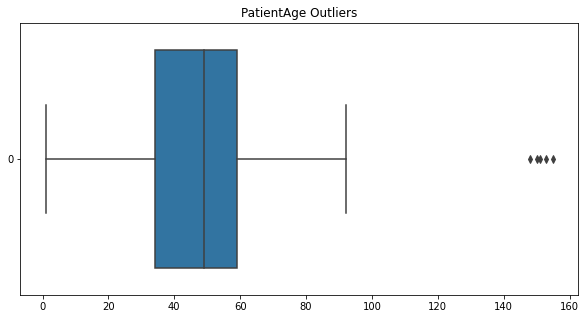

In [9]:
fig = plt.figure(figsize = (10, 5))
fig_box_plot = sns.boxplot(data = source_df['PatientAge'], orient = 'h').set_title('PatientAge Outliers')

#### Observation :
* There are outliers in Patient Age

#### 7.2. Distribution of Pneumonia across the Patient's Age

In [ ]:
#Age
p_flag_0 =source_df[source_df["Target"] == 0]['PatientAge']
p_flag_1 = source_df[source_df["Target"] == 1]['PatientAge']

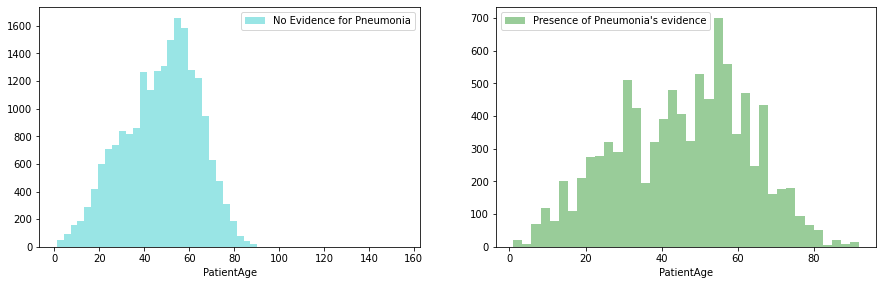

In [ ]:
plt.figure(figsize=(15, 15))
#Plotting Age group
plt.subplot(3,2,1)
sns.distplot(p_flag_0, color = 'c',label='No Evidence for Pneumonia',kde=False)
plt.legend()
plt.subplot(3,2,2)
sns.distplot(p_flag_1, color = 'g',label='Presence of Pneumonia\'s evidence',kde=False)
plt.legend()
plt.show()

#### 7.3. Distribution of Pneumonia across the Gender

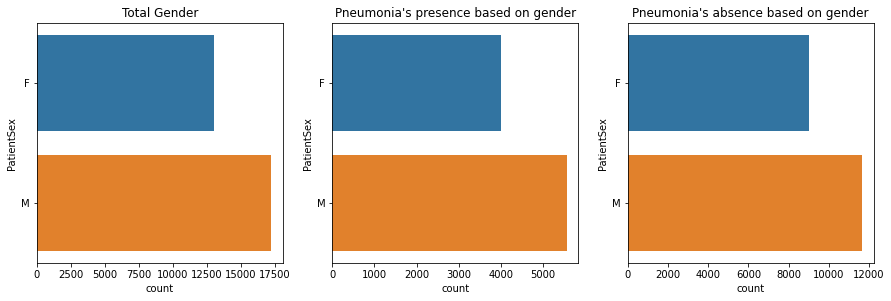

In [ ]:
plt.figure(figsize=(15, 15))
#Plotting Gender
plt.subplot(3,3,1)
sns.countplot(y = source_df['PatientSex']).set_title('Total Gender')
plt.subplot(3,3,2)
sns.countplot(y = source_df.loc[(source_df['Target'] == 1), 'PatientSex']).set_title('Pneumonia\'s presence based on gender')
plt.subplot(3,3,3)
sns.countplot(y = source_df.loc[(source_df['Target'] == 0), 'PatientSex']).set_title('Pneumonia\'s absence based on gender')
plt.show()


#### 7.4. Distribution of Pneumonia based on ViewPosition (VP/PA)

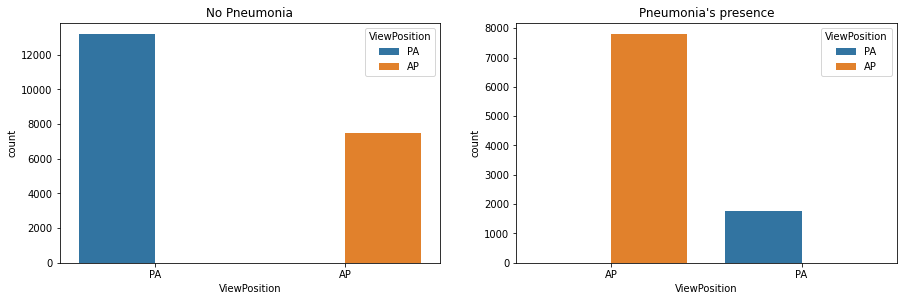

In [32]:
#ViewPosition = AP/VP
vp_flag_0 =source_df[source_df["Target"] == 0]['ViewPosition']
vp_flag_1 = source_df[source_df["Target"] == 1]['ViewPosition']
plt.figure(figsize=(15, 15))
plt.subplot(3,2,1)
sns.countplot(vp_flag_0,hue=source_df['ViewPosition']).set_title('No Pneumonia')
plt.subplot(3,2,2)
sns.countplot(vp_flag_1,hue=source_df['ViewPosition']).set_title('Pneumonia\'s presence')
plt.show()

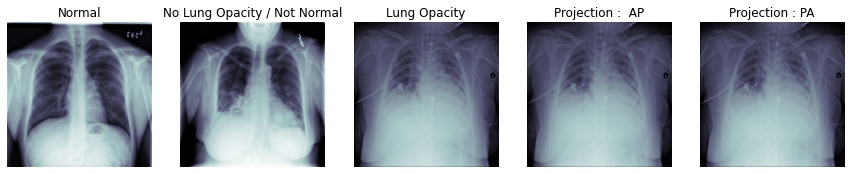

In [ ]:
normal_img = source_df.loc[source_df['class'] == 'Normal'].iloc[0]
not_normal_img = source_df.loc[source_df['class'] == 'No Lung Opacity / Not Normal'].iloc[0]
opacity_img = source_df.loc[source_df['class'] == 'Lung Opacity'].iloc[1]
ap_img = source_df.loc[(source_df['ViewPosition'] == 'AP')].iloc[0]
pa_img = source_df.loc[(source_df['ViewPosition'] == 'PA')].iloc[0]
dcm1 = dcm.dcmread(normal_img['path'])
dcm2 = dcm.dcmread(not_normal_img['path'])
dcm3 = dcm.dcmread(opacity_img['path'])
dcm4 = dcm.dcmread(ap_img['path'])
dcm5 = dcm.dcmread(ap_img['path'])

f, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1, 5, figsize = (15, 8))
ax1.imshow(dcm1.pixel_array, cmap = plt.cm.bone)
ax1.set_title('Normal')
ax1.axis('off')
ax2.imshow(dcm2.pixel_array, cmap = plt.cm.bone)
ax2.set_title('No Lung Opacity / Not Normal')
ax2.axis('off')
ax3.imshow(dcm3.pixel_array, cmap = plt.cm.bone)
ax3.set_title('Lung Opacity')
ax3.axis('off')
ax4.imshow(dcm3.pixel_array, cmap = plt.cm.bone)
ax4.set_title('Projection :  AP')
ax4.axis('off')

ax5.imshow(dcm3.pixel_array, cmap = plt.cm.bone)
ax5.set_title('Projection : PA')
ax5.axis('off')

plt.show()